In [1]:
from __future__ import print_function

import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import os
import time

pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

In [2]:
chromedriver = "/usr/local/bin/chromedriver"


def check_performance(port=8000, sleep=2, page_calls=100,
					  foldername='00_web-component', 
					  path='performance_test_result/00_image-slider'):
	"""opens the chrome browser multiple times 
        and saves the token contents from 'bodyRendering' into a bodyRender.json file
	    
	Args:
		port: Number defining on which port of localhost the application is running on
		sleep: time in seconds before page reload
		page_calls: amount of times the URL is requested
		foldername: name of the folder, where to store the resulting JSON file
		path: relative path to foldername
	"""
    
    # first we open a chrome browser window with the help of Selinium's webdriver
    # we wait 30 miliseconds for the browser window to open
	url = 'http://127.0.0.1:' + str(port)
	driver = webdriver.Chrome(chromedriver)
	driver.implicitly_wait(100)
	
    # in a loop we reload the page n times
    # for making sure the page was rendered completely and the LocalStorage was filled 
        # we wait some seconds before the page refresh
	for i in range(page_calls):
		driver.get(url)
		time.sleep(sleep)
	
    # let's get the LocalStogage 'bodyRendering' token
	result = driver.execute_script("return localStorage.getItem('bodyRendering')")
	
    # close the browser session
	driver.quit()
	
	local_path = path
	
	#get current working directory
	path = os.getcwd() + '/' + path + '/' + foldername
	
    # write the resulting JSON file
	f = open(path + "/BodyRendering.json","w")
	f.write(result)
	f.close()
	print('🥳  🎉 🍾 Yay, successfully created "'+ local_path + '/' + foldername + '/BodyRendering.json"' )
	
	# return the mean value of our resulting performance array
	return pd.read_json(result).mean()[0]
		



In [3]:
chromedriver = "/usr/local/bin/chromedriver"


def check_performance_new_boot(port=8000, sleep=2, page_calls=100,
							   foldername='00_web-component', 
							   path='performance_test_result/00_image-slider'):
	"""opens chrome browser multiple times 
        and saves the token contents from 'bodyRendering' into a bodyRender.json file
	    
	Args:
		port: Number defining on which port of localhost the application is running on
		sleep: time in seconds before page reload
		page_calls: amount of times the URL is requested
		foldername: name of the folder, where to store the resulting JSON file
		path: relative path to foldername
	"""
    
	# first we define the url of the application 
	# and initialize our resulting performance array
	url = 'http://127.0.0.1:' + str(port)
	result = []
	
	# in a loop we open and close the chrome browser and get the specified url
	# for making sure the page was rendered completely and the LocalStorage was filled 
		# we wait some seconds before we add the single value in the LocalStorage array 
		# to our resulting performance array
	for i in range(page_calls):
		driver = webdriver.Chrome(chromedriver)
		driver.implicitly_wait(100)
		driver.get(url)
		time.sleep(sleep)
		result.append(pd.read_json((
            driver.execute_script("return localStorage.getItem('bodyRendering')")
        )).values[0][0])

		driver.quit()
	
	local_path = path
	
	#get current working directory
	path = os.getcwd() + '/' + path + '/' + foldername
	
    # write the resulting JSON file
	f = open(path + "/BodyRendering.json","w")
	f.write(str(result))
	f.close()
	print('🥳  🎉 🍾 Yay, successfully created "'+ local_path + '/' + foldername + '/BodyRendering.json"' )

	
    # return the mean value of our resulting performance array
	return np.mean(result)
	
		



In [10]:
foldernames = ['00_web-component',  
               '01-angular', 
               '02-polymer', 
               '03-vue']

[check_performance_new_boot(page_calls=100,sleep=5, foldername=foldernames[i], port=8000+i) for i in range(len(foldernames))]

🥳  🎉 🍾 Yay, successfully created "performance_test_result/00_image-slider/00_web-component/BodyRendering.json"
🥳  🎉 🍾 Yay, successfully created "performance_test_result/00_image-slider/01-angular/BodyRendering.json"
🥳  🎉 🍾 Yay, successfully created "performance_test_result/00_image-slider/02-polymer/BodyRendering.json"
🥳  🎉 🍾 Yay, successfully created "performance_test_result/00_image-slider/03-vue/BodyRendering.json"


[3107.410999999374, 3160.6430000000546, 3021.2839999998687, 3040.6850000002305]

In [11]:
body_rendering_path = 'performance_test_result/00_image-slider/'

# read the json files in with pandas
web_component_dataframe = pd.read_json(body_rendering_path + '00_web-component/BodyRendering.json')
angular_dataframe = pd.read_json(body_rendering_path + '01-angular/BodyRendering.json')
polymer_dataframe = pd.read_json(body_rendering_path + '02-polymer/BodyRendering.json')
vue_dataframe = pd.read_json(body_rendering_path + '03-vue/BodyRendering.json')

# create a dataframe for the plain components and set the column names
frames = [web_component_dataframe, angular_dataframe, polymer_dataframe, vue_dataframe]
performance_columns = ['web_component', 'angular', 'polymer', 'vue']
performance_dataframe = pd.concat(frames, axis=1, sort=False)
performance_dataframe.columns = performance_columns



performance_dataframe.describe()

,web_component,angular,polymer,vue
count,100.0,100.0,100.0,100.0
mean,3107.4,3160.6,3021.3,3040.7
std,25.6,7.0,4.2,4.6
min,3089.6,3144.7,3013.8,3030.0
25%,3098.5,3155.3,3018.3,3037.8
50%,3103.7,3160.6,3020.9,3040.2
75%,3110.5,3165.0,3024.2,3043.3
max,3346.9,3180.5,3045.1,3056.2


<Figure size 432x288 with 0 Axes>

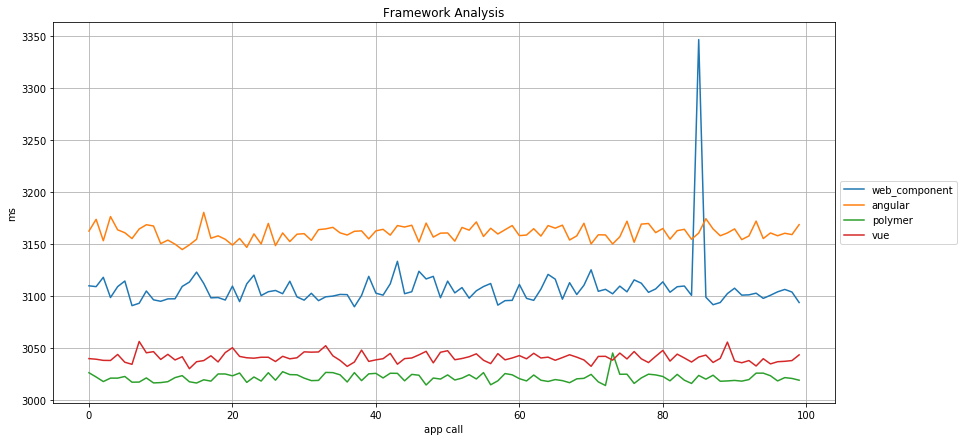

In [12]:
# figure for the web components created with the frameworks
f = plt.figure()
performance_dataframe.plot(kind='line',figsize=(14,7), title="Framework Analysis",
                                       grid=True,stacked = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("ms")
plt.xlabel("app call")
plt.show()